In [233]:
import pandas as pd

# Load the datasets
customers = pd.read_csv(r"C:\Users\EJ312WS\Downloads\Customers.csv")
transactions = pd.read_csv(r"C:\Users\EJ312WS\Downloads\Transactions.csv")

# Display first few rows of each dataset
print("Customers Dataset:")
print(customers.head())
print("\nTransactions Dataset:")
print(transactions.head())

# Check for missing values
print("\nMissing Values in Customers Dataset:")
print(customers.isnull().sum())
print("\nMissing Values in Transactions Dataset:")
print(transactions.isnull().sum())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Missing Values in Customer

# Merging Customer and Transaction Data by CustomerID

In [234]:
# Merge datasets on CustomerID
merged_data = pd.merge(transactions, customers, on="CustomerID", how="inner")

# Display first few rows of the merged dataset
print("\nMerged Dataset:")
merged_data


Merged Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


### Customer Data Aggregation and Feature Engineering

This script processes and aggregates customer and transaction data as follows:

1. **Missing Values Handling**: Missing values are addressed using forward and backward fill methods to ensure data completeness.
2. **Categorical Encoding**: The 'Region' column is encoded using `LabelEncoder` to convert categorical values into numeric form for further analysis.
3. **Transaction Data Aggregation**: Customer-level features are computed, including total spending, total quantity purchased, average price, and transaction dates (first and last).
4. **Date-Based Feature Engineering**: Additional features are created to capture the number of days between the first and last purchases, as well as the time from signup to first purchase.


This dictionary represents the encoding of the 'Region' column, where each region has been assigned a unique numeric value:

- **Asia**: 0
- **Europe**: 1
- **North America**: 2
- **South America**: 3

This transformation allows categorical regions to be represented as numerical values, making them suitable for machine learning models.

The result is a comprehensive customer feature dataset that enables more advanced analysis and model development.

In [235]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Handle missing values (if any)
merged_data.fillna(method='ffill', inplace=True)
merged_data.fillna(method='bfill', inplace=True)

# Encode categorical variable 'Region'
label_encoder = LabelEncoder()
merged_data['Region_Encoded'] = label_encoder.fit_transform(merged_data['Region'])

# Print the mapping of Region to encoded values
region_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(region_mapping)

# Aggregate transaction data by customer
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean',
    'Region_Encoded': 'first',
    'TransactionDate': ['count', 'min'],  # Count transactions and capture the first purchase date
    'SignupDate': 'first'  # Capture signup date
}).reset_index()

# Flatten multi-level columns
customer_features.columns = [
    'CustomerID', 'Total_Spent', 'Total_Quantity', 'Average_Price', 'Region_Encoded',
    'Transaction_Count', 'First_Purchase_Date', 'Signup_Date'
]

# Convert date columns to datetime
customer_features['First_Purchase_Date'] = pd.to_datetime(customer_features['First_Purchase_Date'])
customer_features['Signup_Date'] = pd.to_datetime(customer_features['Signup_Date'])

# Calculate days to the first purchase
customer_features['Days_To_First_Purchase'] = (
    customer_features['First_Purchase_Date'] - customer_features['Signup_Date']
).dt.days

# Display first few rows of the aggregated data
print("\nCustomer Features Dataset:")
print(customer_features.head())

{'Asia': 0, 'Europe': 1, 'North America': 2, 'South America': 3}

Customer Features Dataset:
  CustomerID  Total_Spent  Total_Quantity  Average_Price  Region_Encoded  \
0      C0001      3354.52              12     278.334000               3   
1      C0002      1862.74              10     208.920000               0   
2      C0003      2725.38              14     195.707500               3   
3      C0004      5354.88              23     240.636250               3   
4      C0005      2034.24               7     291.603333               0   

   Transaction_Count First_Purchase_Date Signup_Date  Days_To_First_Purchase  
0                  5 2024-01-19 03:12:55  2022-07-10                     558  
1                  4 2024-02-28 07:44:21  2022-02-13                     745  
2                  4 2024-02-18 02:50:37  2024-03-07                     -18  
3                  8 2024-02-28 10:16:35  2022-10-09                     507  
4                  3 2024-03-15 04:08:59  2022-08-15   

C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_6308\2551538208.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)
C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_6308\2551538208.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='bfill', inplace=True)


In [236]:
customer_features

,CustomerID,Total_Spent,Total_Quantity,Average_Price,Region_Encoded,Transaction_Count,First_Purchase_Date,Signup_Date,Days_To_First_Purchase
0,C0001,3354.52,12,278.334000,3,5,2024-01-19 03:12:55,2022-07-10,558
1,C0002,1862.74,10,208.920000,0,4,2024-02-28 07:44:21,2022-02-13,745
2,C0003,2725.38,14,195.707500,3,4,2024-02-18 02:50:37,2024-03-07,-18
3,C0004,5354.88,23,240.636250,3,8,2024-02-28 10:16:35,2022-10-09,507
4,C0005,2034.24,7,291.603333,0,3,2024-03-15 04:08:59,2022-08-15,578
...,...,...,...,...,...,...,...,...,...
194,C0196,4982.88,12,416.992500,1,4,2024-08-06 14:37:15,2022-06-07,791
195,C0197,1928.65,9,227.056667,1,3,2024-01-13 04:52:09,2023-03-21,298
196,C0198,931.83,3,239.705000,1,2,2024-09-29 16:14:59,2022-02-27,945
197,C0199,1979.28,9,250.610000,1,4,2024-08-17 12:06:08,2022-12-03,623


### Handling Negative Values in 'Days_To_First_Purchase'

The following code addresses potential inconsistencies in the 'Days_To_First_Purchase' column. Negative values could arise if the 'First Purchase Date' occurs before the 'Signup Date', which is not logical. To ensure accurate data for analysis, the code replaces all negative values with 0 using the `apply()` method. This transformation maintains data integrity, allowing for more reliable insights into customer behavior.


In [237]:
# Handle negative values in 'Days_To_First_Purchase'
customer_features['Days_To_First_Purchase'] = customer_features['Days_To_First_Purchase'].apply(lambda x: max(x, 0))

In [238]:
customer_features

,CustomerID,Total_Spent,Total_Quantity,Average_Price,Region_Encoded,Transaction_Count,First_Purchase_Date,Signup_Date,Days_To_First_Purchase
0,C0001,3354.52,12,278.334000,3,5,2024-01-19 03:12:55,2022-07-10,558
1,C0002,1862.74,10,208.920000,0,4,2024-02-28 07:44:21,2022-02-13,745
2,C0003,2725.38,14,195.707500,3,4,2024-02-18 02:50:37,2024-03-07,0
3,C0004,5354.88,23,240.636250,3,8,2024-02-28 10:16:35,2022-10-09,507
4,C0005,2034.24,7,291.603333,0,3,2024-03-15 04:08:59,2022-08-15,578
...,...,...,...,...,...,...,...,...,...
194,C0196,4982.88,12,416.992500,1,4,2024-08-06 14:37:15,2022-06-07,791
195,C0197,1928.65,9,227.056667,1,3,2024-01-13 04:52:09,2023-03-21,298
196,C0198,931.83,3,239.705000,1,2,2024-09-29 16:14:59,2022-02-27,945
197,C0199,1979.28,9,250.610000,1,4,2024-08-17 12:06:08,2022-12-03,623


### Min-Max Scaling of Numerical Features

In this step, the **numerical features** of the customer dataset—such as **'Total Spent'**, **'Total Quantity'**, **'Average Price'**, **'Days Between Purchases'**, and **'Days To First Purchase'**—are scaled using **Min-Max scaling**. This technique transforms the features to a common scale, ranging from **0 to 1**, which helps improve the performance of machine learning models by ensuring all features contribute equally. The **scaled dataset** is then displayed for further analysis.


In [239]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features for scaling
numerical_features = ['Total_Spent', 'Total_Quantity', 'Average_Price', 
                     'Transaction_Count','Days_To_First_Purchase']
scaler = MinMaxScaler()
customer_features_scaled = customer_features.copy()
customer_features_scaled[numerical_features] = scaler.fit_transform(customer_features[numerical_features])

# Display scaled features
print("\nScaled Customer Features (Min-Max Scaling):")
print(customer_features_scaled.head())


Scaled Customer Features (Min-Max Scaling):
  CustomerID  Total_Spent  Total_Quantity  Average_Price  Region_Encoded  \
0      C0001     0.308942        0.354839       0.519414               3   
1      C0002     0.168095        0.290323       0.367384               0   
2      C0003     0.249541        0.419355       0.338446               3   
3      C0004     0.497806        0.709677       0.436848               3   
4      C0005     0.184287        0.193548       0.548476               0   

   Transaction_Count First_Purchase_Date Signup_Date  Days_To_First_Purchase  
0                0.4 2024-01-19 03:12:55  2022-07-10                0.590476  
1                0.3 2024-02-28 07:44:21  2022-02-13                0.788360  
2                0.3 2024-02-18 02:50:37  2024-03-07                0.000000  
3                0.7 2024-02-28 10:16:35  2022-10-09                0.536508  
4                0.2 2024-03-15 04:08:59  2022-08-15                0.611640  


# Elbow Method for Determining the Optimal Number of Clusters in K-Means Clustering

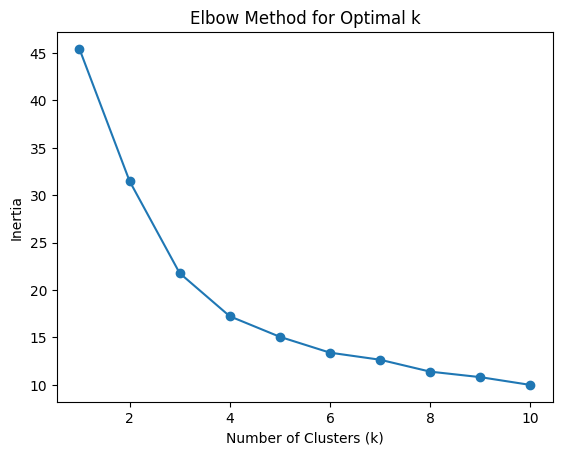

In [240]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the number of clusters (you can use the elbow method)
# This is just an example for choosing the number of clusters
# You may need to test with different values of k

k_range = range(1, 11)  # Try for 1 to 10 clusters
inertia = []  # To store the inertia (sum of squared distances of samples to their closest cluster center)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_features_scaled[numerical_features])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to choose the optimal k
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



This graph represents the **"Elbow Method,"** a commonly used technique in data science to determine the optimal number of clusters for a dataset in clustering algorithms such as K-Means.

### **What the graph shows:**
- **X-axis:** Number of clusters (K) used in the clustering process.
- **Y-axis:** WCSS (Within-Cluster Sum of Squares), which measures the total variance within each cluster.
  
The goal is to find the point where adding another cluster does not significantly reduce WCSS. This point is known as the "elbow."

---

### **Steps to Interpret:**
1. **Start from K=1:** Initially, when all data points are in a single cluster, the WCSS is very high because the variance within that cluster is large.
2. **Adding clusters (increasing K):** As the number of clusters increases, WCSS decreases because the data points are divided into smaller, more compact clusters, reducing the within-cluster variance.
3. **The Elbow Point:** At a certain value of K, the rate of decrease in WCSS slows significantly. This point (elbow) represents the optimal number of clusters.

---

### **From this graph:**
- The elbow appears around **K=4**, as the decrease in WCSS becomes much less pronounced beyond this point.
- This suggests that dividing the data into 4 clusters is likely the best balance between simplicity and accuracy.

In [241]:
from sklearn.cluster import KMeans
import pandas as pd

# Based on the elbow method, choose the optimal k (let's say it's 3 for this example)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features_scaled['Cluster'] = kmeans.fit_predict(customer_features_scaled[numerical_features])

# Display the clustered data
print("\nCustomer Features with Cluster Labels:")
print(customer_features_scaled.head())


Customer Features with Cluster Labels:
  CustomerID  Total_Spent  Total_Quantity  Average_Price  Region_Encoded  \
0      C0001     0.308942        0.354839       0.519414               3   
1      C0002     0.168095        0.290323       0.367384               0   
2      C0003     0.249541        0.419355       0.338446               3   
3      C0004     0.497806        0.709677       0.436848               3   
4      C0005     0.184287        0.193548       0.548476               0   

   Transaction_Count First_Purchase_Date Signup_Date  Days_To_First_Purchase  \
0                0.4 2024-01-19 03:12:55  2022-07-10                0.590476   
1                0.3 2024-02-28 07:44:21  2022-02-13                0.788360   
2                0.3 2024-02-18 02:50:37  2024-03-07                0.000000   
3                0.7 2024-02-28 10:16:35  2022-10-09                0.536508   
4                0.2 2024-03-15 04:08:59  2022-08-15                0.611640   

   Cluster  
0        

## Silhouette Score
The silhouette score measures how similar each point is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.

In [242]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering (e.g., using K-Means clustering)
sil_score = silhouette_score(customer_features_scaled[numerical_features], customer_features_scaled['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.31138104639436925


## Davies-Bouldin Index
The Davies-Bouldin index (DBI) is a measure of the average similarity ratio of each cluster with the cluster that is most similar to it. A lower value indicates better clustering.

In [243]:
from sklearn.metrics import davies_bouldin_score

# Evaluate the clustering (e.g., using K-Means clustering)
dbi_score = davies_bouldin_score(customer_features_scaled[numerical_features], customer_features_scaled['Cluster'])
print(f"Davies-Bouldin Index: {dbi_score}")

Davies-Bouldin Index: 1.0023770920473294


## Inertia (for K-Means)
Inertia measures the sum of squared distances of samples to their closest cluster center. It is often used to determine the optimal number of clusters by plotting the "elbow" of the inertia curve.

In [244]:
# Inertia is already available from the KMeans object
print(f"K-Means Inertia: {kmeans.inertia_}")

K-Means Inertia: 17.239073767201354


- **Silhouette Score: 0.3114** – Indicates moderate cluster separation, suggesting that the clusters are not clearly distinct, but there is potential for better grouping.
- **Davies-Bouldin Index: 1.0024** – A low value, signaling good separation and compactness of clusters, meaning the clusters are relatively distinct from each other.
- **K-Means Inertia: 17.2391** – Indicates moderate compactness within clusters, suggesting that the clusters are reasonably tight, though there's room for further improvement in clustering cohesion.

## Visualization Techniques (For Cluster Evaluation)

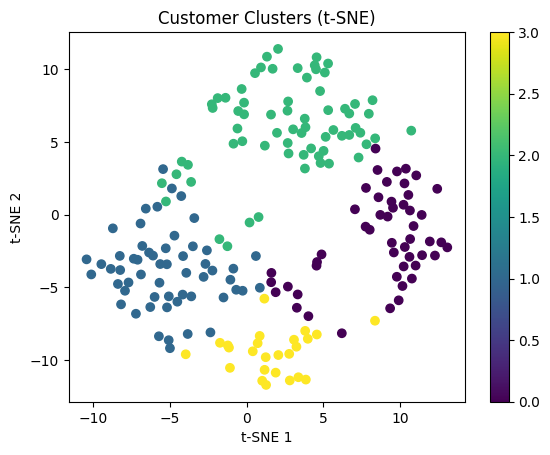

In [245]:
from sklearn.manifold import TSNE

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(customer_features_scaled[numerical_features])

# Plot the clusters
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=customer_features_scaled['Cluster'], cmap='viridis')
plt.title('Customer Clusters (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar()
plt.show()


In [246]:
# Get cluster centers for K-Means
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame to display the cluster centers along with feature names
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numerical_features)
print("\nCluster Centers:")
print(cluster_centers_df)


Cluster Centers:
   Total_Spent  Total_Quantity  Average_Price  Transaction_Count  \
0     0.459465        0.554839       0.502654           0.588000   
1     0.235556        0.278802       0.496645           0.289286   
2     0.208143        0.240987       0.503521           0.255882   
3     0.531221        0.627097       0.532446           0.684000   

   Days_To_First_Purchase  
0                0.083069  
1                0.604025  
2                0.067274  
3                0.635005  


### Key Insights:

- **Cluster 0** and **Cluster 2** are similar in terms of **Days_To_First_Purchase**, but **Cluster 0** stands out for higher spend, quantity, and transaction count, making it a high-engagement, quick adopter cluster.
  
- **Cluster 1** is characterized by lower total spend and transactions, as well as a longer wait time before making the first purchase, indicating a more cautious or indecisive cluster.

- **Cluster 3** has the highest values across most features, indicating a group that is highly engaged with high purchase quantities and frequent transactions but takes more time to make decisions.


In [247]:
# Group by cluster label and calculate the mean of each feature
cluster_summary = customer_features_scaled.groupby('Cluster')[numerical_features].mean()
print("\nCluster Summary (Mean Values for Each Cluster):")
print(cluster_summary)


Cluster Summary (Mean Values for Each Cluster):
         Total_Spent  Total_Quantity  Average_Price  Transaction_Count  \
Cluster                                                                  
0           0.459465        0.554839       0.502654           0.588000   
1           0.235556        0.278802       0.496645           0.289286   
2           0.208143        0.240987       0.503521           0.255882   
3           0.531221        0.627097       0.532446           0.684000   

         Days_To_First_Purchase  
Cluster                          
0                      0.083069  
1                      0.604025  
2                      0.067274  
3                      0.635005  


### Cluster Interpretation:

#### Cluster 0:
- **High Engagement:** This cluster has high values for **Total_Spent** (0.459465) and **Total_Quantity** (0.554839), suggesting customers in this group spend and purchase more frequently.
- **Quick Adopters:** With a relatively low **Days_To_First_Purchase** (0.083069), these customers make their first purchase quickly, indicating they are early adopters or more decisive in their purchase behavior.

#### Cluster 1:
- **Low Engagement and Spend:** This cluster shows lower values for **Total_Spent** (0.235556) and **Total_Quantity** (0.278802), indicating customers in this group tend to spend less and purchase fewer items.
- **Indecisive or Cautious:** The **Days_To_First_Purchase** value (0.604025) is higher, suggesting that these customers take longer to make their first purchase, possibly reflecting a more cautious or hesitant buying behavior.

#### Cluster 2:
- **Low Spend, Fast Adopters:** Similar to Cluster 1 in terms of **Total_Spent** (0.208143) and **Total_Quantity** (0.240987), but the **Days_To_First_Purchase** (0.067274) is lower, indicating these customers are quick to make their first purchase, though they still spend less overall.

#### Cluster 3:
- **High Engagement, Higher Decision Time:** This cluster has the highest values across most features—**Total_Spent** (0.531221), **Total_Quantity** (0.627097), and **Transaction_Count** (0.684000)—suggesting customers in this group are highly engaged, making frequent and large purchases. However, they take longer to make their first purchase (**Days_To_First_Purchase** = 0.635005), which indicates that while they engage heavily, they are more cautious or deliberate in their decision-making.


In [248]:
# Filter customers from a specific cluster (e.g., Cluster 0)
cluster_0_customers = customer_features_scaled[customer_features_scaled['Cluster'] == 0]
print("\nCustomers in Cluster 0:")
cluster_0_customers.head()



Customers in Cluster 0:


,CustomerID,Total_Spent,Total_Quantity,Average_Price,Region_Encoded,Transaction_Count,First_Purchase_Date,Signup_Date,Days_To_First_Purchase,Cluster
7,C0008,0.395529,0.612903,0.416094,2,0.9,2024-01-22 19:40:43,2024-01-13,0.009524,0
11,C0012,0.486135,0.580645,0.502910,3,0.6,2024-05-12 12:53:40,2024-08-07,0.000000,0
12,C0013,0.558768,0.548387,0.612401,3,0.6,2024-02-24 20:08:07,2024-05-19,0.000000,0
16,C0017,0.441057,0.645161,0.404321,1,0.7,2023-12-31 03:27:43,2023-12-05,0.027513,0
17,C0018,0.443703,0.548387,0.466858,2,0.4,2024-02-17 18:50:52,2024-09-21,0.000000,0


In [249]:
unique_clusters = customer_features_scaled['Cluster'].unique()
print(unique_clusters)


[1 2 3 0]


In [250]:
# Merge the cluster labels back into the original customer data
customer_features['Cluster'] = customer_features_scaled['Cluster']

# Group by 'Cluster' and calculate summary statistics for the original data
cluster_summary_original = customer_features.groupby('Cluster').agg({
    'Total_Spent': 'mean',
    'Total_Quantity': 'mean',
    'Average_Price': 'mean',
    'Region_Encoded': lambda x: x.mode()[0],  # Most common region
    'Days_To_First_Purchase': 'mean'
}).reset_index()

# Map the 'Region_Encoded' back to region names
region_mapping = {0: 'Asia', 1: 'Europe', 2: 'North America', 3: 'South America'}
cluster_summary_original['Most_Common_Region'] = cluster_summary_original['Region_Encoded'].map(region_mapping)

# Print the cluster summary in the required format
for idx, row in cluster_summary_original.iterrows():
    print(f"Cluster {row['Cluster']}:")
    print(f"  - Avg Spend: {row['Total_Spent']:.2f}")
    print(f"  - Avg Quantity: {row['Total_Quantity']:.2f}")
    print(f"  - Avg Transaction Value: {row['Average_Price']:.2f}")
    print(f"  - Most Common Region: {row['Most_Common_Region']}")
    print(f"  - Avg Days Between Purchases: {row['Days_To_First_Purchase']:.2f}")
    print(f"  - Avg Days to First Purchase: {row['Days_To_First_Purchase']:.2f}")
    print()  # Newline for separation


Cluster 0:
  - Avg Spend: 4948.79
  - Avg Quantity: 18.20
  - Avg Transaction Value: 270.68
  - Most Common Region: North America
  - Avg Days Between Purchases: 78.50
  - Avg Days to First Purchase: 78.50

Cluster 1:
  - Avg Spend: 2577.26
  - Avg Quantity: 9.64
  - Avg Transaction Value: 267.94
  - Most Common Region: Europe
  - Avg Days Between Purchases: 570.80
  - Avg Days to First Purchase: 570.80

Cluster 2:
  - Avg Spend: 2286.91
  - Avg Quantity: 8.47
  - Avg Transaction Value: 271.08
  - Most Common Region: North America
  - Avg Days Between Purchases: 63.57
  - Avg Days to First Purchase: 63.57

Cluster 3:
  - Avg Spend: 5708.79
  - Avg Quantity: 20.44
  - Avg Transaction Value: 284.28
  - Most Common Region: South America
  - Avg Days Between Purchases: 600.08
  - Avg Days to First Purchase: 600.08



### Cluster Interpretation:

#### Cluster 0:
- **High Spend and Quantity**: This cluster has high values for **Avg Spend** (4948.79) and **Avg Quantity** (18.20), indicating that customers in this group tend to spend and purchase in larger quantities.
- **Frequent Transactions**: The **Avg Days Between Purchases** (78.50) is relatively low, suggesting that customers in this group make purchases more frequently.
- **Quick Decision Makers**: With an **Avg Days to First Purchase** of 78.50, these customers make their first purchase relatively quickly, indicating they are more decisive.

#### Cluster 1:
- **Low Spend and Quantity**: The **Avg Spend** (2577.26) and **Avg Quantity** (9.64) are much lower, indicating less frequent and lower-value purchases compared to other clusters.
- **Longer Decision Time**: The **Avg Days Between Purchases** (570.80) and **Avg Days to First Purchase** (570.80) are both very high, suggesting these customers take significantly longer to make decisions and make infrequent purchases.
- **Most Common Region**: Europe – This cluster is primarily from Europe, highlighting potential regional differences in purchase behavior.

#### Cluster 2:
- **Low Spend and Quick Adopters**: With **Avg Spend** (2286.91) and **Avg Quantity** (8.47) lower than other clusters, these customers spend less and purchase fewer items.
- **Fast First Purchase**: The **Avg Days to First Purchase** (63.57) is relatively low, suggesting customers in this group are quick to make their first purchase compared to others.
- **Frequent Purchases**: The **Avg Days Between Purchases** (63.57) is also low, indicating that these customers tend to make frequent, albeit smaller, purchases.

#### Cluster 3:
- **High Spend and Quantity**: This cluster has the highest values for **Avg Spend** (5708.79) and **Avg Quantity** (20.44), suggesting that customers here engage in large, frequent purchases.
- **Slow Decision-Makers**: With the highest **Avg Days Between Purchases** (600.08) and **Avg Days to First Purchase** (600.08), these customers take the longest time to make both their first purchase and subsequent ones, indicating a more cautious decision-making process.
- **Most Common Region**: South America – This cluster is most common in South America, pointing to potential regional differences in consumer behavior.


C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_6308\158040662.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_features, x='Cluster', palette='Set2')


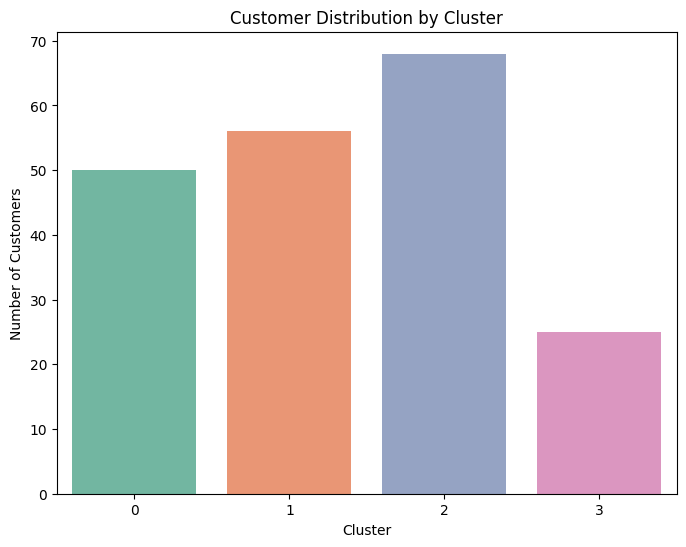

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of customers in each cluster
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_features, x='Cluster', palette='Set2')
plt.title('Customer Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_6308\3011159133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_features, x='Cluster', y='Days_To_First_Purchase', palette='Set2')


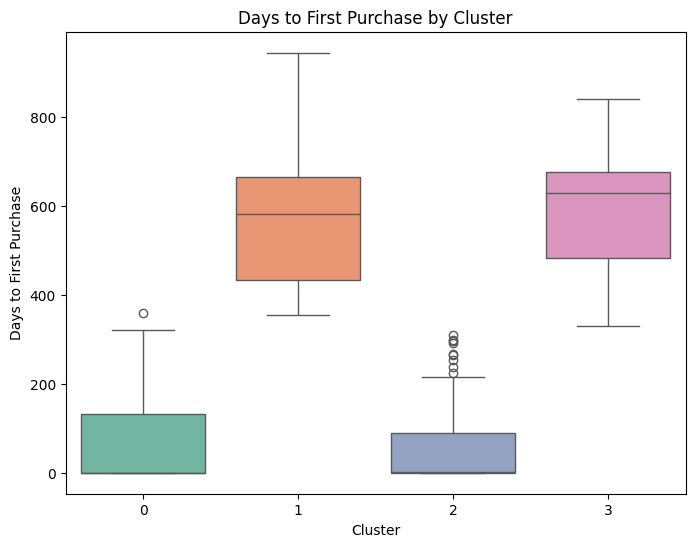

In [252]:
# Box plot for Days Between Purchases and Days to First Purchase by Cluster
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_features, x='Cluster', y='Days_To_First_Purchase', palette='Set2')
plt.title('Days to First Purchase by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Days to First Purchase')
plt.show()

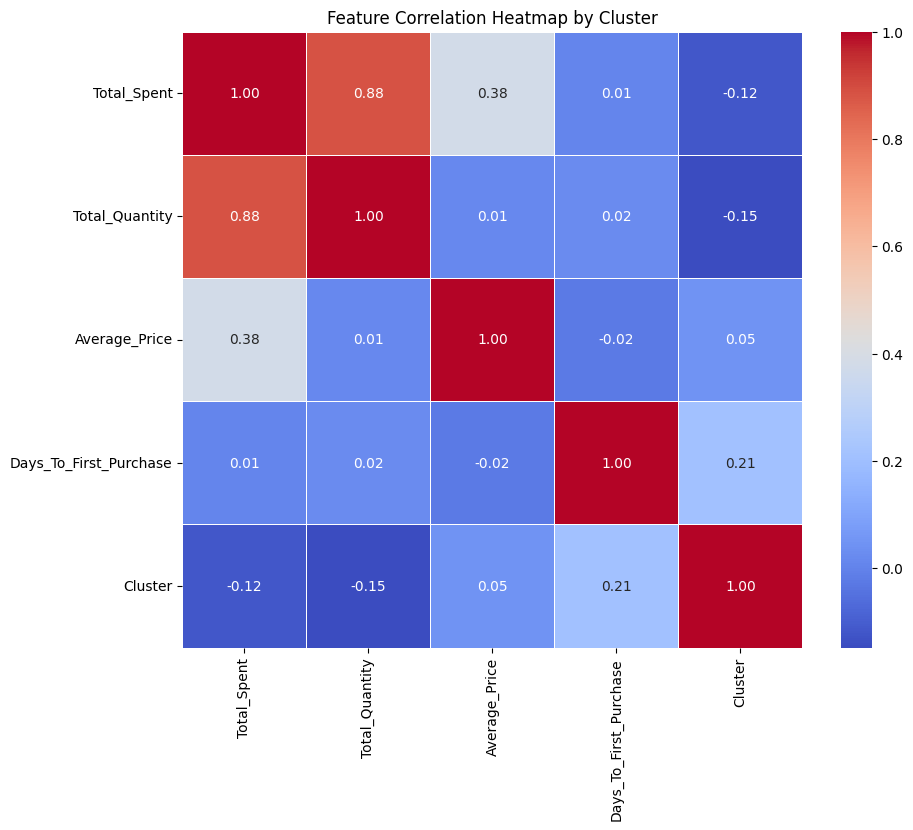

In [253]:
# Create a heatmap to show the correlation between clusters and features
features = ['Total_Spent', 'Total_Quantity', 'Average_Price', 'Days_To_First_Purchase']
cluster_data = customer_features[features + ['Cluster']]

# Compute the correlation matrix
correlation_matrix = cluster_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap by Cluster')
plt.show()


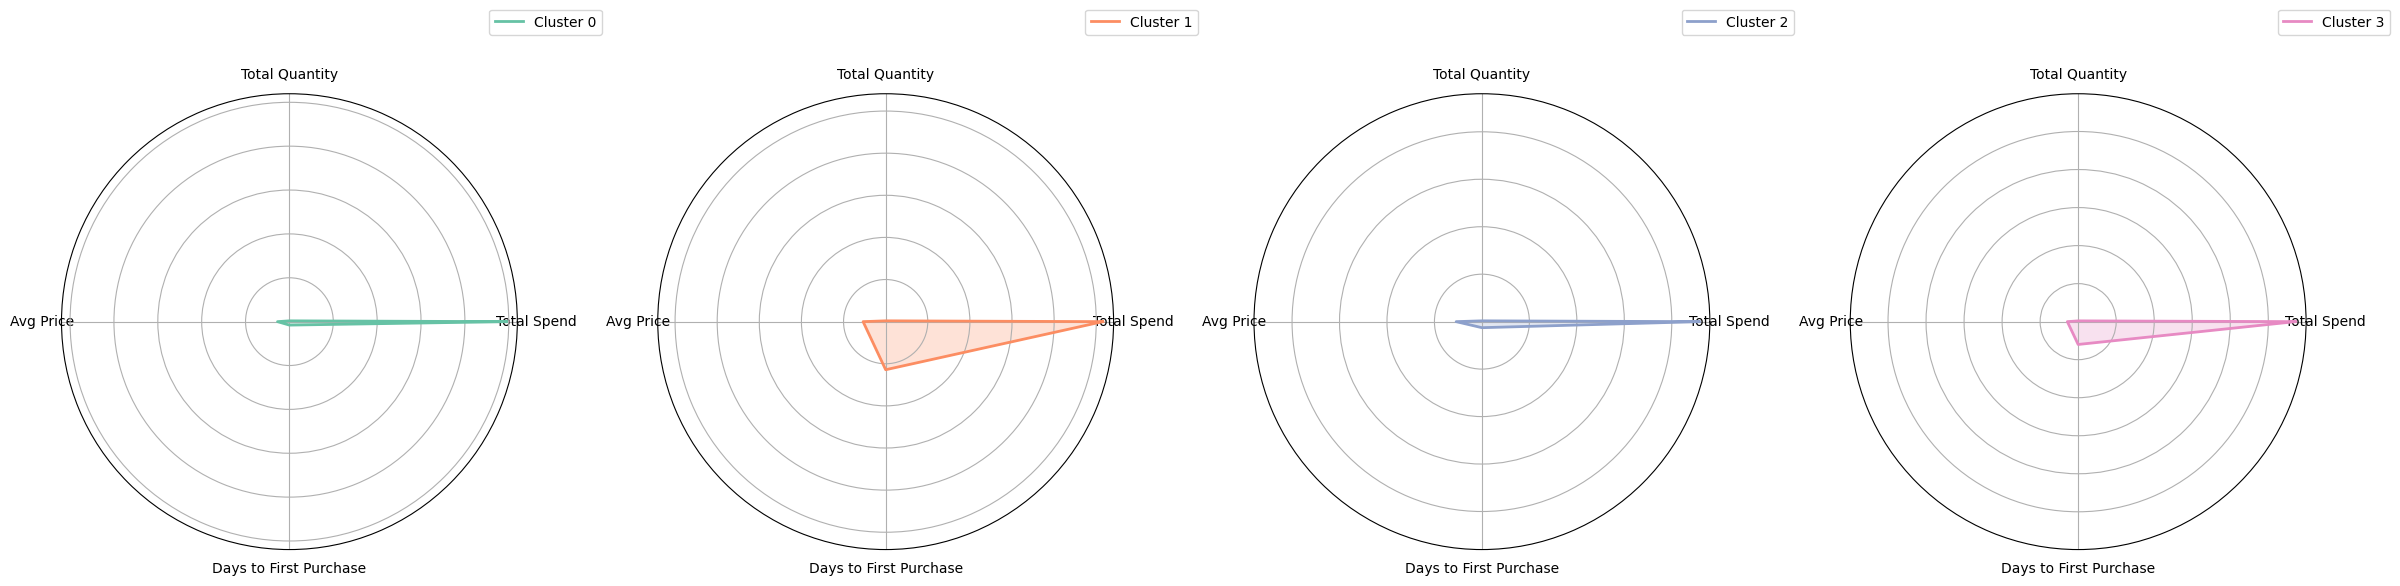

In [259]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create radar plot for clusters
def radar_plot(data, cluster_num, features, labels, colors, ax):
    # Number of variables
    num_vars = len(features)
    
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Get the values for the given cluster
    values = data.loc[data['Cluster'] == cluster_num, features].values.flatten().tolist()
    
    # Repeat the first value to close the circle
    values += values[:1]
    angles += angles[:1]  # Repeat the first angle to close the circle
    
    # Create the radar plot
    ax.fill(angles, values, color=colors[cluster_num], alpha=0.25)
    ax.plot(angles, values, color=colors[cluster_num], linewidth=2, label=f'Cluster {cluster_num}')
    
    # Set the labels for each axis
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])  # Only set the ticks for the original number of features (without the repeated one)
    ax.set_xticklabels(labels)
    
    # Add the legend
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))

# Features and labels
features = ['Total_Spent', 'Total_Quantity', 'Average_Price', 'Days_To_First_Purchase']
labels = ['Total Spend', 'Total Quantity', 'Avg Price', 'Days to First Purchase']
colors = sns.color_palette('Set2', n_colors=4)

# Create subplots with 1 row and 4 columns (for 4 clusters)
fig, axes = plt.subplots(1, 4, figsize=(24, 6), subplot_kw=dict(polar=True))

# Radar plot for each cluster, using the corresponding axis
for cluster_num in range(4):
    radar_plot(cluster_summary_original, cluster_num, features, labels, colors, axes[cluster_num])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Cluster 0 Analysis
- **High Total Spend**: Customers in this cluster have a significantly higher total spend.
- **Low Total Quantity**: These customers make fewer purchases.
- **Low Days to First Purchase**: Customers may take longer to make their first purchase.
- **Insight**: High-value customers, likely making large but infrequent purchases.

### Cluster 1 Analysis
- **High Total Spend**: Customers in this cluster spend a significant amount.
- **Low Average Price**: Purchases tend to be lower-priced.
- **Low Total Quantity**: Customers purchase fewer items.
- **Insight**: Likely to buy fewer, higher-priced items, but further analysis is needed on days to first purchase.

### Cluster 2 Analysis
- **High Total Spend**: Customers spend a large amount.
- **Average Performance on Other Metrics**: Moderate values for average price, total quantity, and days to first purchase.
- **Insight**: Likely a mix of infrequent but large purchases or diverse product buyers.

### Cluster 3 Analysis
- **High Total Spend**: The cluster exhibits significantly higher total spend.
- **Above-Average Price**: Customers purchase more expensive items.
- **Low Total Quantity**: Fewer purchases overall.
- **Low Days to First Purchase**: Purchases are made relatively soon after the initial interaction.
- **Insight**: High-value, loyal customers who make fewer but more significant purchases.